In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
default_dir = "/content/drive/MyDrive/VIX/Kalbe Data Science"
os.chdir(default_dir)

In [ ]:
!ls

'Case Study - Customer.csv'  'Case Study - Store.csv'
'Case Study - Product.csv'   'Case Study - Transaction.csv'


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rc('axes', grid=True)

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [ ]:
data_customer = pd.read_csv('Case Study - Customer.csv', sep = ';')
data_product= pd.read_csv('Case Study - Product.csv', sep = ';')
data_store = pd.read_csv('Case Study - Store.csv', sep = ';')
data_transaction = pd.read_csv('Case Study - Transaction.csv', sep = ';')

# Read Dataset

In [ ]:
data_customer.head()


,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
data_product.head()


,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
data_store.head()


,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
data_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [ ]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
df1 = pd.merge(data_transaction, data_customer, on='CustomerID')
df2 = pd.merge(df1, data_store, on = 'StoreID')
df_merged = pd.merge(df2, data_product, on = 'ProductID')
df_merged.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  StoreName       5020 non-null   object
 13  GroupStore      5020 non-null   object
 14  Type            5020 non-null   object
 15  Latitude        5020 non-null   object
 16  Longitude       5020 non-null   object
 17  Product Name    5020 non-null   object
 18  Price_y 

# Data Cleaning

In [ ]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500


In [ ]:
df_merged['Income'] = df_merged['Income'].apply(lambda x: x.replace(',', '')).astype(float)


In [ ]:
df_merged['Latitude'] = df_merged['Latitude'].apply(lambda x: x.replace(',', '.')).astype(float)
df_merged['Longitude'] = df_merged['Longitude'].apply(lambda x: x.replace(',', '.')).astype(float)

In [ ]:
for col in df_merged.columns:
  pct_missing = np.mean(df_merged[col].isnull())*100
  formatted_pct = '{:.2f}'.format(pct_missing)
  print('{} - {}%'.format(col, formatted_pct))

TransactionID - 0.00%
CustomerID - 0.00%
Date - 0.00%
ProductID - 0.00%
Price_x - 0.00%
Qty - 0.00%
TotalAmount - 0.00%
StoreID - 0.00%
Age - 0.00%
Gender - 0.00%
Marital Status - 0.88%
Income - 0.00%
StoreName - 0.00%
GroupStore - 0.00%
Type - 0.00%
Latitude - 0.00%
Longitude - 0.00%
Product Name - 0.00%
Price_y - 0.00%


In [ ]:
df_merged.dropna(inplace=True)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price_x         4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   Age             4976 non-null   int64         
 9   Gender          4976 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          4976 non-null   float64       
 12  StoreName       4976 non-null   object        
 13  GroupStore      4976 non-null   object        
 14  Type            4976 non-null   object        
 15  Lati

In [ ]:
df_merged.describe()

,CustomerID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude,Price_y
count,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000
mean,220.597267,9690.293408,3.642484,32268.629421,7.492162,40.079582,0.448151,795.514268,-2.944228,109.602110,9690.293408
std,128.735807,4601.844969,1.855968,19661.512914,4.027835,12.862586,0.497354,575.729035,4.321477,8.368621,4601.844969
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,-7.797068,95.323753,3200.000000
25%,108.750000,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,369.000000,-6.914864,104.756554,4200.000000
50%,220.000000,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,695.000000,-5.135399,110.370529,9400.000000
75%,330.000000,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,1065.000000,0.533505,114.590111,15000.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,72.000000,1.000000,3578.000000,5.548290,128.190643,18000.000000


# Exploratory Data Analysis

In [ ]:
df_product = df_merged['Product Name'].value_counts()
df_product

Thai Tea         803
Cheese Stick     614
Ginger Candy     527
Coffee Candy     517
Crackers         515
Yoghurt          484
Oat              483
Choco Bar        392
Potato Chip      388
Cashew           253
Name: Product Name, dtype: int64

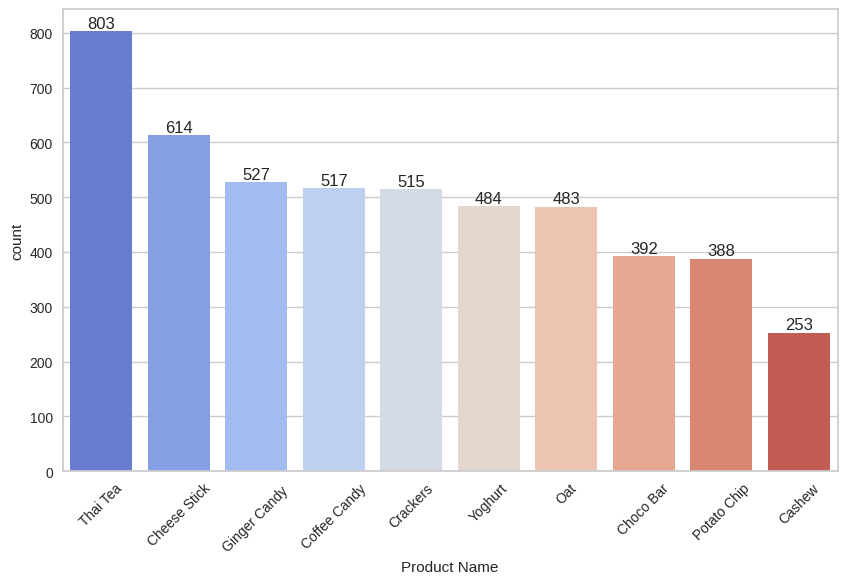

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=df_merged, x='Product Name', order=df_product.index, palette='coolwarm')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

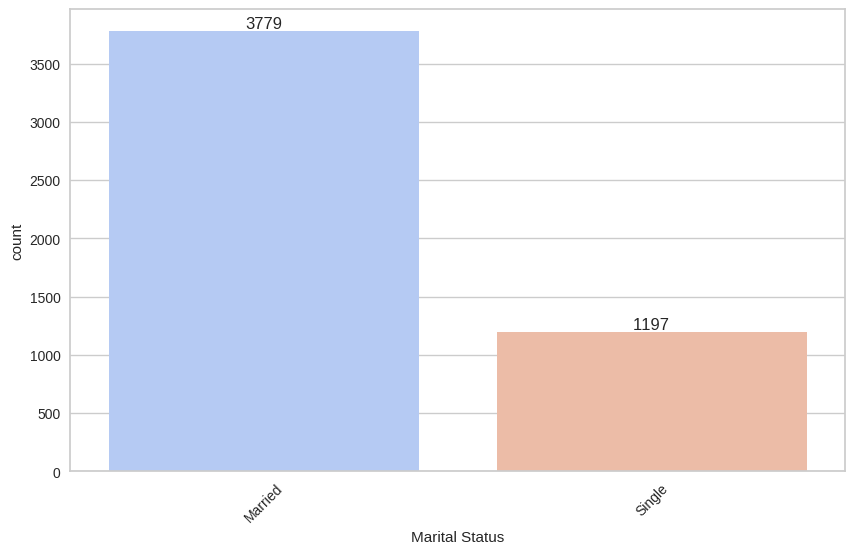

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=df_merged, x='Marital Status', order=df_merged['Marital Status'].value_counts().index, palette='coolwarm')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
df_merged.Type.unique()

array(['General Trade', 'Modern Trade'], dtype=object)

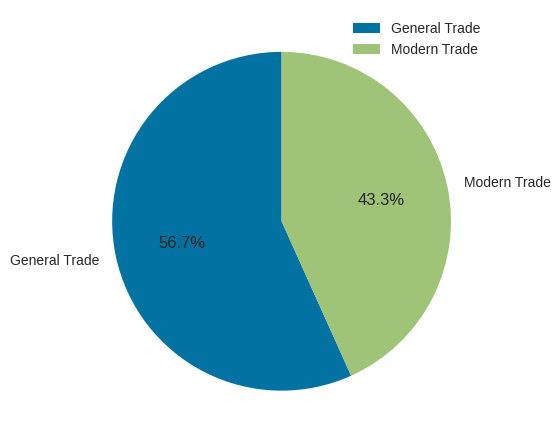

In [ ]:
size = df_merged['Type'].value_counts().values
labels = df_merged['Type'].value_counts().index

plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.legend(loc='upper right')

In [ ]:
df_merged.groupby('Product Name')['TotalAmount'].sum()

Product Name
Cashew           11232000
Cheese Stick     27255000
Choco Bar        20917600
Coffee Candy     19505000
Crackers         13612500
Ginger Candy      8358400
Oat              15376000
Potato Chip      13056000
Thai Tea         11806200
Yoghurt          19450000
Name: TotalAmount, dtype: int64

In [ ]:
import matplotlib.dates as mdates

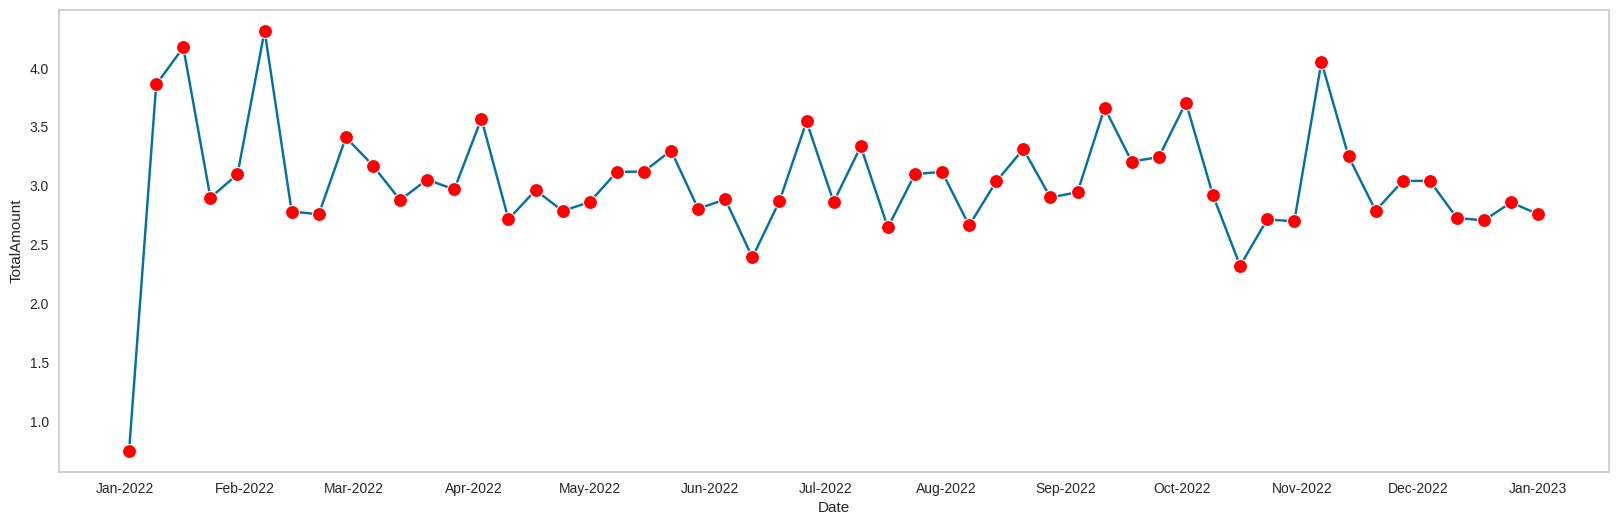

In [ ]:
weekly_purchasements = df_merged.copy()
weekly_purchasements = weekly_purchasements.groupby(
    by=pd.Grouper(key='Date', freq='1W'))['TotalAmount'].sum()
fig, ax = plt.subplots(figsize=(20, 6))
ax=sns.lineplot(x= weekly_purchasements.index,
                y= weekly_purchasements/1000000,
                marker='o',
                markersize=10,
                markerfacecolor= 'red')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

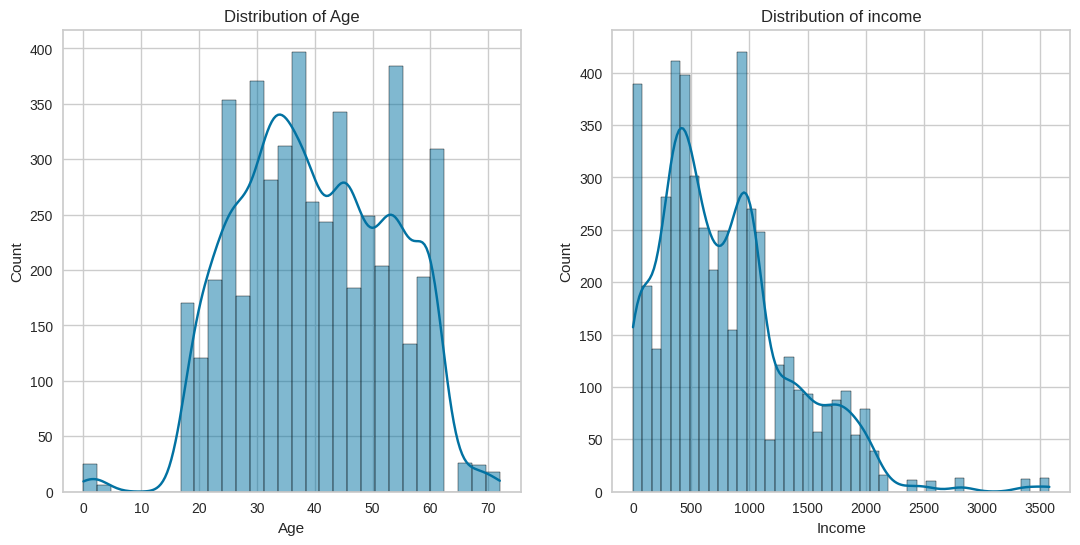

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13, 6))
sns.histplot(df_merged['Age'], kde=True, ax=ax1)
ax1.set_title('Distribution of Age')

sns.histplot(df_merged['Income'], kde=True, ax=ax2)
ax2.set_title('Distribution of income')

plt.show()

# Modelling

In [ ]:
df_reg = df_merged.groupby('Date').agg({'Qty' : 'sum'})
df_reg

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


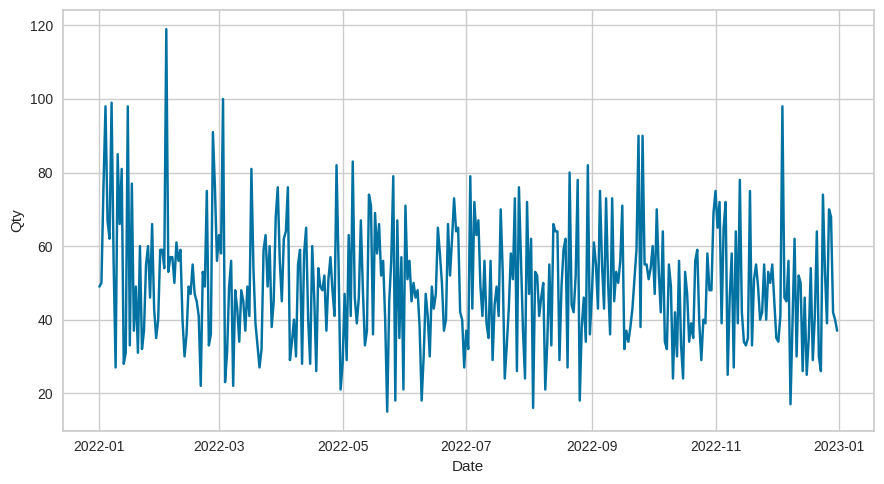

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.lineplot(data=df_reg, x='Date', y='Qty')
plt.tight_layout()
plt.show()

In [ ]:
#Split Data Train & Data Test
# Memisahkan Data
train_size = int(len(df_reg) * 0.8)
train, test = df_reg[:train_size], df_reg[train_size:]
print(train.shape, test.shape)

(292, 1) (73, 1)


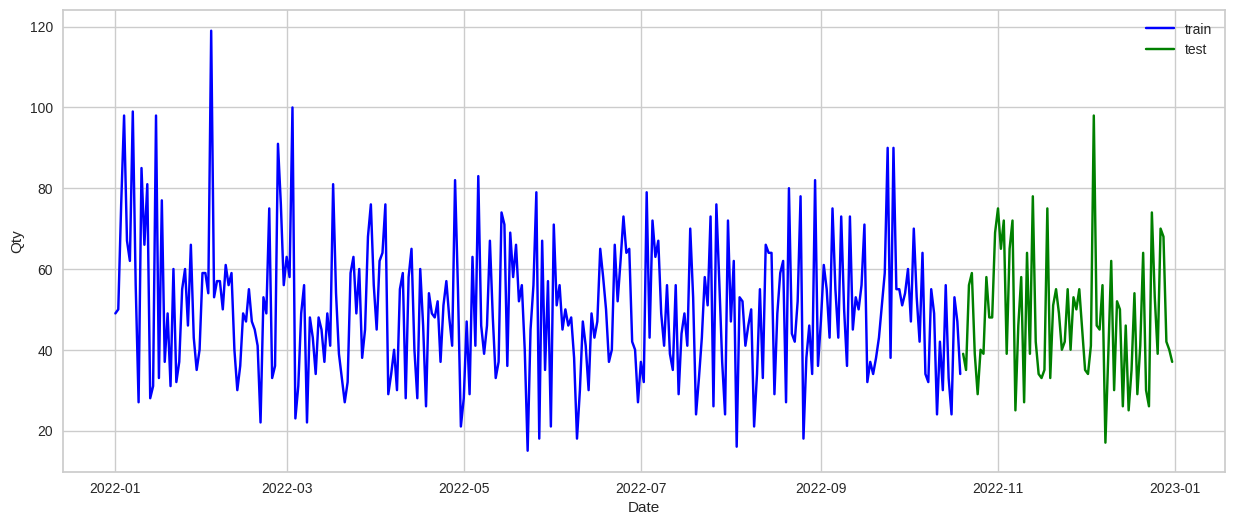

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=train, x=train.index, y=train['Qty'], color='blue', label='train')
sns.lineplot(data=test, x=test.index, y=test['Qty'], color='green', label='test')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_reg_seasonal = df_reg
reg_composition = seasonal_decompose(df_reg_seasonal)

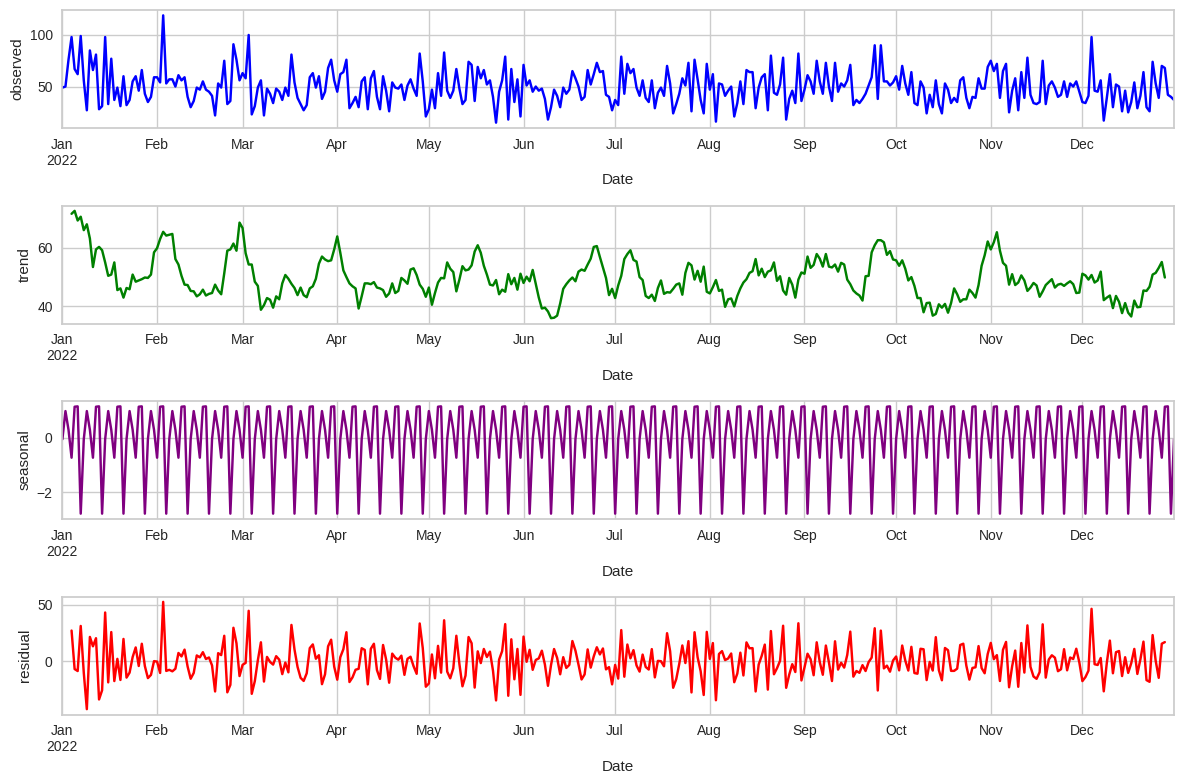

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12, 8))
reg_composition.observed.plot(ax = ax1, color='blue')
ax1.set_ylabel('observed')
reg_composition.trend.plot(ax = ax2, color='green')
ax2.set_ylabel('trend')
reg_composition.seasonal.plot(ax = ax3, color='purple')
ax3.set_ylabel('seasonal')
reg_composition.resid.plot(ax = ax4, color='red')
ax4.set_ylabel('residual')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adftest(dataset):
  dftest = adfuller(dataset, autolag='AIC')
  df_output = pd.Series(dftest[0:4], index=['Test Statistic', 'P-value', 'Num of Lags', 'Num Of Observations Used'])
  for key, value in dftest[4].items():
    df_output['Critical Value (%s)'%key] = value
  print(df_output)

print(adftest(df_reg))

Test Statistic              -19.091514
P-value                       0.000000
Num of Lags                   0.000000
Num Of Observations Used    364.000000
Critical Value (1%)          -3.448443
Critical Value (5%)          -2.869513
Critical Value (10%)         -2.571018
dtype: float64
None


In [ ]:
auto_arima_model = auto_arima(train, seasonal=False, stepwise=False, suppress_warnings=True, trace=True)
print(auto_arima_model.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3148.880, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2958.985, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2854.559, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2806.846, Time=0.31 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2742.365, Time=0.24 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2720.255, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2675.327, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2495.886, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2497.851, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2499.545, Time=0.45 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2500.500, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2595.516, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2497.848, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2498.709, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2500.705, Time=0.56 sec
 ARIMA(3,0

In [ ]:
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit()

In [ ]:
predictions = model_fit.forecast(steps=len(test))
print(predictions)

2022-10-20    50.631202
2022-10-21    49.767859
2022-10-22    50.528036
2022-10-23    49.858697
2022-10-24    50.448054
                ...    
2022-12-27    50.172180
2022-12-28    50.172030
2022-12-29    50.172162
2022-12-30    50.172046
2022-12-31    50.172148
Freq: D, Name: predicted_mean, Length: 73, dtype: float64


In [ ]:
def evaluation_metrics(y_actual, y_pred):
  print(f'RMSE value : {mean_squared_error(y_actual, y_pred)** 0.5}')
  print(f'R-squared Value: {r2_score(y_actual, y_pred)}')
  print(f'MAE Value: {mean_absolute_error(y_actual, y_pred)}')

In [ ]:
evaluation_metrics(test, predictions)

RMSE value : 15.689182340222287
R-squared Value: -0.02694690124274235
MAE Value: 13.008518855946072


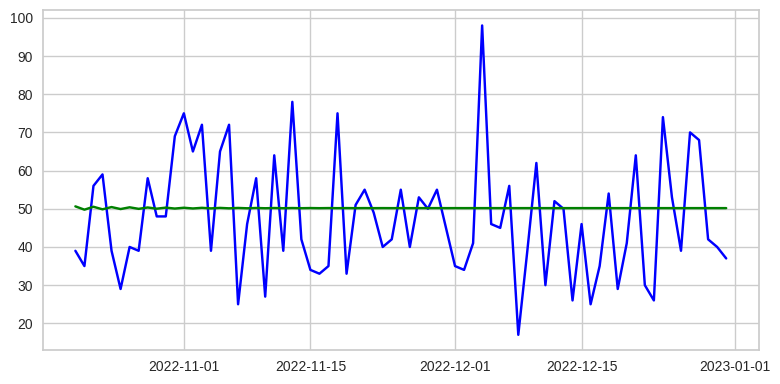

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(test.index, test, color='blue', label='original')
plt.plot(test.index, predictions, color='green', label='predictions')
plt.tight_layout()
plt.show()

In [ ]:
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [ ]:
forecast_auto = auto_arima.predict(len(test))

In [ ]:
forecast_manual = ARIMA(train, order=(40,1,1))
model_manual = forecast_manual.fit()

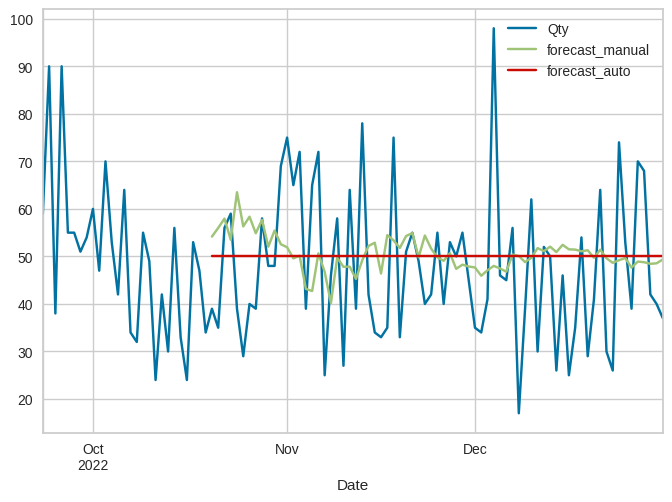

In [ ]:
forecast_manual = model_manual.forecast(len(test))
forecast_auto = auto_arima.predict(len(test))

df_plot = df_reg.iloc[-100:]

df_plot['forecast_manual'] = [None]*(len(df_plot)-len(forecast_manual)) + list(forecast_manual)
df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)

df_plot.plot()
plt.show()

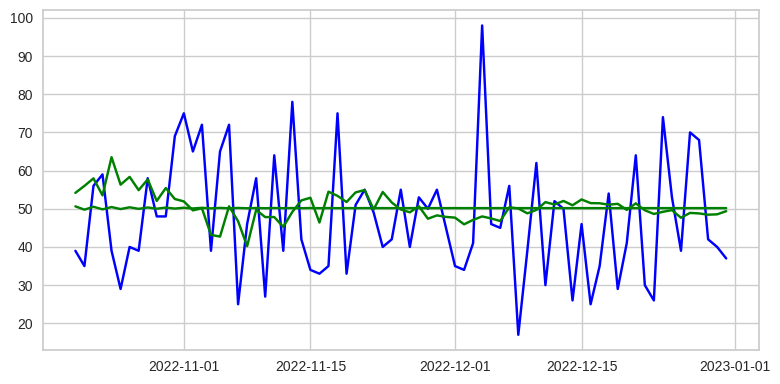

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(test.index, test, color='blue', label='original')
plt.plot(test.index, predictions, color='green', label='predictions')
plt.plot(test.index, forecast_manual, color='green', label='predictions')
plt.tight_layout()
plt.show()

# Clustering Segmentation


In [ ]:
df_cluster = df_merged.groupby('CustomerID').agg({
    'TransactionID':'count',
    'Qty':'sum',
    'TotalAmount':'sum'
}).reset_index()

print(df_cluster)

     CustomerID  TransactionID  Qty  TotalAmount
0             1             17   60       623300
1             2             13   57       392300
2             3             15   56       446200
3             4             10   46       302500
4             5              7   27       268600
..          ...            ...  ...          ...
439         442             13   37       269400
440         444             18   62       577700
441         445             18   68       587200
442         446             11   42       423300
443         447             13   42       439300

[444 rows x 4 columns]


In [ ]:
data_cluster = df_cluster.drop(columns='CustomerID')

In [ ]:
data_cluster.isnull().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [ ]:
#Standarisasi dataset
X = data_cluster.values
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
df_std = pd.DataFrame(data=X_std, columns=data_cluster.columns)

In [ ]:
X_std

array([[ 1.78828224,  1.50893374,  2.10242393],
       [ 0.55344971,  1.27289149,  0.24634281],
       [ 1.17086598,  1.19421074,  0.67942841],
       ...,
       [ 2.09699037,  2.13837973,  1.81236104],
       [-0.06396655,  0.09268025,  0.49542729],
       [ 0.55344971,  0.09268025,  0.62398702]])

In [ ]:
df_std

,TransactionID,Qty,TotalAmount
0,1.788282,1.508934,2.102424
1,0.553450,1.272891,0.246343
2,1.170866,1.194211,0.679428
3,-0.372675,0.407403,-0.475199
4,-1.298799,-1.087531,-0.747585
...,...,...,...
439,0.553450,-0.300723,-0.741157
440,2.096990,1.666295,1.736029
441,2.096990,2.138380,1.812361
442,-0.063967,0.092680,0.495427


In [ ]:
''''
X_norm = MinMaxScaler().fit_transform(X)
X_norm

In [ ]:
wcss = []
for n in range(1, 11):
  model = KMeans(n_clusters = n, init='k-means++', n_init=10, max_iter=300, tol=0.001, random_state=100)
  model.fit(X_std)
  wcss.append(model.inertia_)
print(wcss)





[1332.0000000000005, 543.4711248616254, 316.56555030944656, 237.60472575971139, 191.20935927689905, 169.43031968455583, 154.14295718886092, 142.48512585227888, 130.91435045328814, 121.69651564034504]


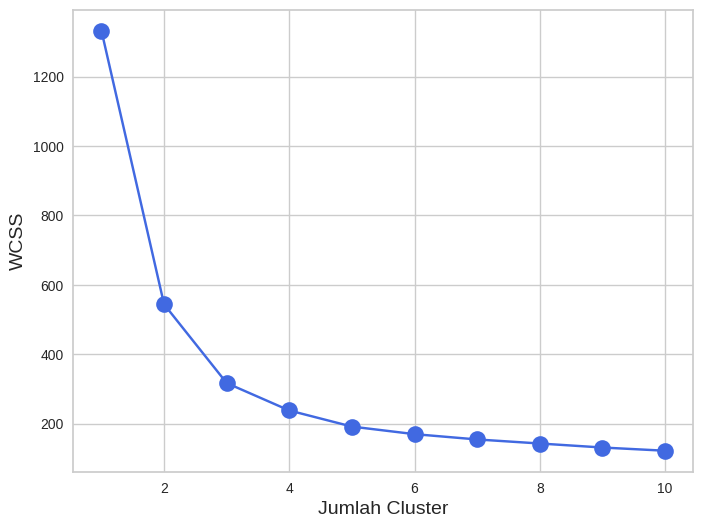

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(list(range(1, 11)), wcss, marker='o', markersize=12, color='royalblue')
plt.xlabel('Jumlah Cluster', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.show()

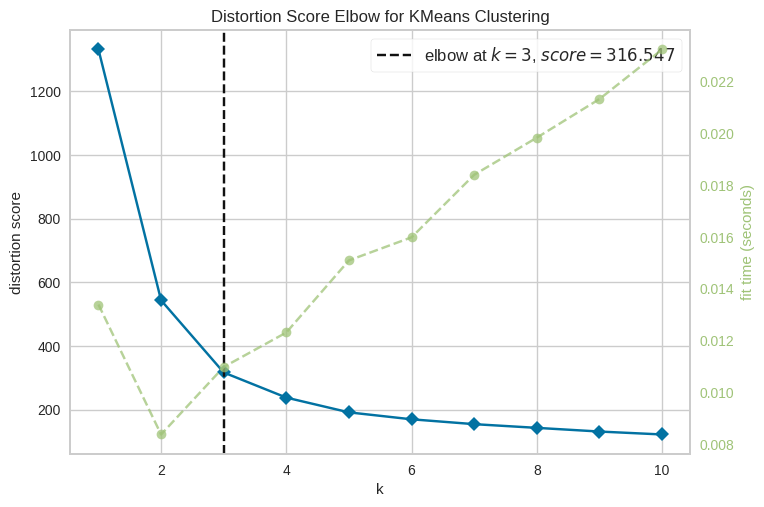

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X_std)
visualizer.show()

In [ ]:
model3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=100 )
model3.fit(X_std)
data_cluster['cluster'] = model3.labels_
data_cluster.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,1
1,13,57,392300,1
2,15,56,446200,1
3,10,46,302500,0
4,7,27,268600,2


In [ ]:
data_cluster.describe()

,TransactionID,Qty,TotalAmount,cluster
count,444.000000,444.000000,444.000000,444.000000
mean,11.207207,40.822072,361641.216216,0.844595
std,3.242960,12.723926,124596.157539,0.858206
min,3.000000,10.000000,92100.000000,0.000000
25%,9.000000,32.000000,270675.000000,0.000000
50%,11.000000,40.000000,353200.000000,1.000000
75%,13.000000,50.000000,439750.000000,2.000000
max,21.000000,79.000000,846700.000000,2.000000


<Figure size 900x600 with 0 Axes>

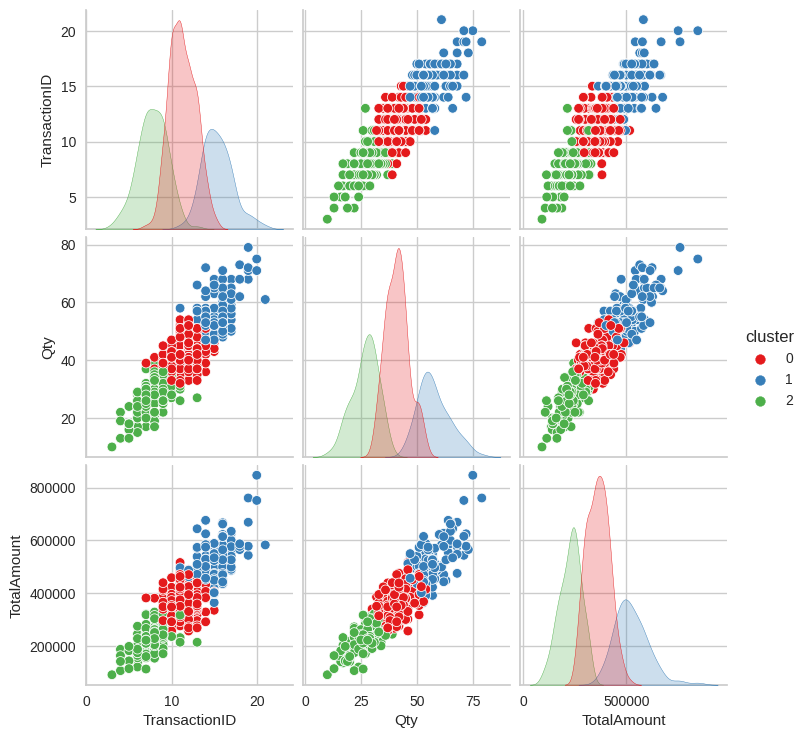

In [ ]:
plt.figure(figsize=(9, 6))
sns.pairplot(data=data_cluster, hue='cluster', palette='Set1')
plt.show()

In [ ]:
data_cluster['CustomerID'] = df_cluster['CustomerID']
cluster_summary = data_cluster.groupby('cluster').agg({
    'CustomerID': 'count',
    'Qty': 'mean',
    'TransactionID': 'mean',
    'TotalAmount': 'mean'
}).round()

cluster_summary

,CustomerID,Qty,TransactionID,TotalAmount
cluster,,,,
0,203,41.0,11.0,362750.0
1,107,58.0,15.0,525432.0
2,134,27.0,8.0,229174.0


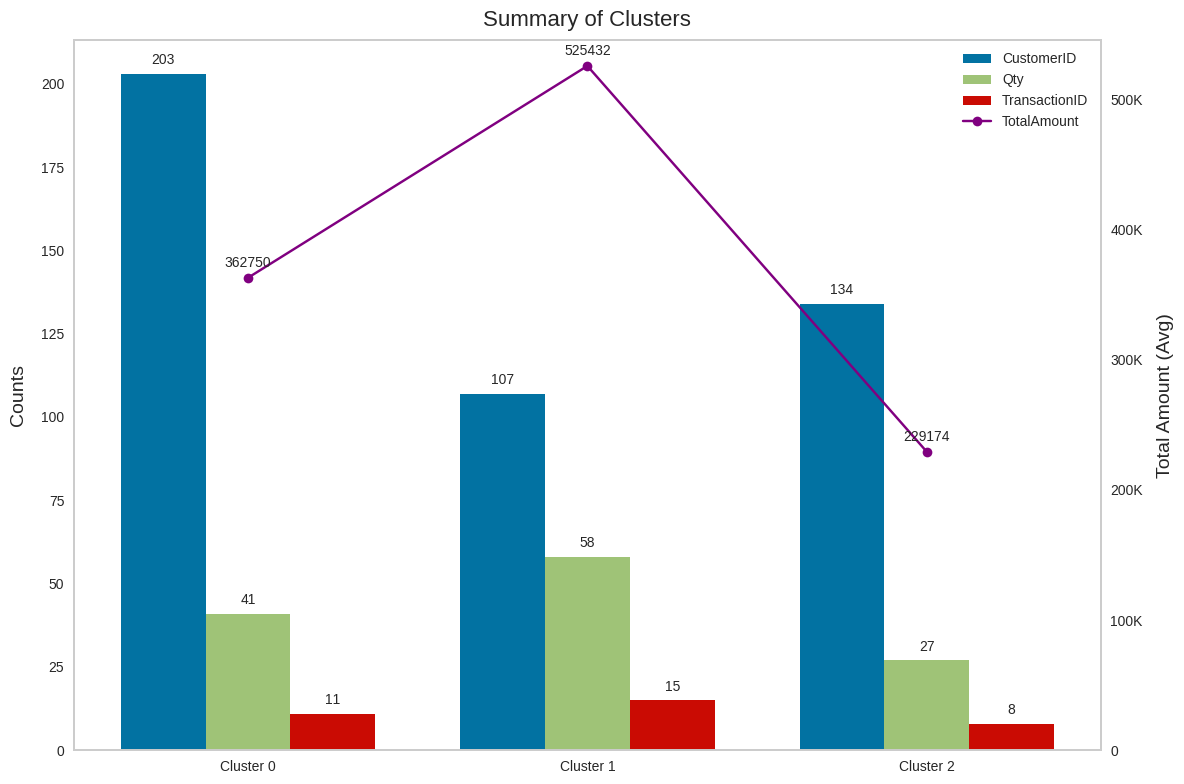

In [ ]:
plt.rc('axes', grid=False)

x_arange = np.arange(len(cluster_summary))
width_bar = 0.25

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting for Total Customers, Average Transaction ID and Average Quantity
for i, metric in enumerate(cluster_summary.columns[0:3]):
    ax.bar(
        x_arange + i*width_bar,
        cluster_summary[metric],
        width_bar,
        label=f'{metric}'
    )
    for j, val in enumerate(cluster_summary[metric]):
        ax.text(j + i*width_bar, val + 2, int(val), ha='center', va='bottom', fontsize=10)

# Plotting Average Total Amount
x_arange_amount = [0.25, 1.25, 2.25]
ax2 = ax.twinx()
ax2.plot(x_arange_amount, cluster_summary['TotalAmount'],
         color='purple', marker='o', label=cluster_summary.columns[3])
for i, val in enumerate(cluster_summary['TotalAmount']):
    ax2.text(i + 0.25, val + 6_000, int(val), ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Counts', labelpad=10, fontsize=14)
ax2.set_ylabel('Total Amount (Avg)', labelpad=10, fontsize=14)
plt.title('Summary of Clusters', pad=10, fontsize=16)

# Equalized the position of the x_arange axis and added labels.
ax.set_xticks(x_arange + width_bar)
ax.set_xticklabels(f'Cluster {label}' for label in cluster_summary.index)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# The y-axis value on the second axis
ax2.set_ylim([0, cluster_summary['TotalAmount'].max() + 20_000])
ax2.set_yticklabels([f'{int(x)}' if x < 1000 else f'{int(x/1000)}K' for x in ax2.get_yticks()])

plt.tight_layout()


Cluster 0:
- Merupakan tipe pembelian kuantitas produk yang sedang dengan rata-rata pembelian 41, dan Rata-rata pengeluaran sebesar Rp 367.750

Cluster 1:
- Merupakan tipe pembelian kuantitas produk yang tertinggi dengan rata-rata pembelian 58, dan Rata-rata pengeluaran sebesar Rp 525.432

Cluster 2:
- Merupakan tipe pembelian kuantitas produk yang terendah dengan rata-rata pembelian 27, dan Rata-rata pengeluaran sebesar Rp 229.174

Strategi Promosi
Cluster 0:
- Memberikan diskon spesial untuk pembelian barang-barang tertentu dan bonus reward setiap pembelian pertama dalam rentang 1 minggu.

Cluster 1
- Memberikan bonus point setiap pembelian untuk produk yang telah ditentukan serta pemberian cashback.

Cluster 2
- Memberikan diskon untuk setiap produk bundling dan pemberian cashback.
